# Misc
_This stuff will probably get moved into another notebook one day_

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
np.set_printoptions(precision=3)
sys.path.insert(0, '../src/')
import pyabf
abf=pyabf.abf.ABF("../data/17o05026_vc_stim.abf")

## Tonic / Phasic Analysis

In data which contains many EPSCs and IPSCs, separation of tonic vs. phasic data is achieved by observing the histogram of each sweep. The _tonic_ value is the peak of the histogram (determined from a polynomial fit of the binned data). The _phasic_ positive/negative value is the average of all values above/below the tonic value.

* Note that `abf.tonicPhasic()` accepts two optional time marks, `t1` and `t2`
* It may be useful to subtract a sweep's RMS noise from the phasic current measurements

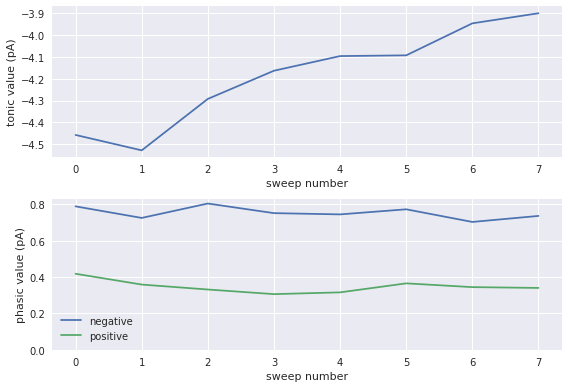

In [2]:
tonicPhasic=np.empty((abf.sweepCount,3))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    tonicPhasic[sweepNumber]=abf.tonicPhasic(t1=1)

plt.subplot(211)
plt.plot(abf.sweepList,tonicPhasic[:,0])
plt.ylabel("tonic value (%s)"%abf.units)
plt.xlabel("sweep number")

plt.subplot(212)
plt.plot(abf.sweepList,tonicPhasic[:,1],label="negative")
plt.plot(abf.sweepList,tonicPhasic[:,2],label="positive")
plt.legend()
plt.ylabel("phasic value (%s)"%abf.units)
plt.xlabel("sweep number")
plt.axis([None,None,0,None])
plt.tight_layout()

## Measuring RMS noise with `abf.rms()`
The RMS (root-mean-square) noise is the standard deviation of the recording when _no signal_ is being recorded. Any fluctuation measured in these conditions is assumed to be due to the internal noise of the system.

To determine the RMS noise, the selected sweep is exploded into many small segments about 100 points in size. Standard deviation of segment is calculated. Segments with IPSCs and voltage steps will have a high standard deviation, and we wish to ignore these. To determine the noise floor, the list of standard deviations is sorted by size and the quietest few segments (most likely to be noise only) are averaged together. The result is a single number representing the RMS value averaged across the quietest portion of the sweep.

In [3]:
for sweep in abf.sweepList:
    abf.setSweep(sweep)
    print("Sweep %d RMS noise floor: %.03f %s"%(sweep,abf.rms(),abf.units))

Sweep 0 RMS noise floor: 0.277 pA
Sweep 1 RMS noise floor: 0.281 pA
Sweep 2 RMS noise floor: 0.291 pA
Sweep 3 RMS noise floor: 0.280 pA
Sweep 4 RMS noise floor: 0.274 pA
Sweep 5 RMS noise floor: 0.275 pA
Sweep 6 RMS noise floor: 0.268 pA
Sweep 7 RMS noise floor: 0.264 pA
